## **Loading Necessary Libraries**

In [229]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [230]:
# Import necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model building related
from sklearn.linear_model import LinearRegression # We used it in RFE for automated feature selection
from sklearn.feature_selection import RFE # We'll use RFE to select top n features
import statsmodels.api as sm # Build Linear Regression model with better statistics
from sklearn.model_selection import GridSearchCV # to get right parameter
from sklearn.linear_model import Ridge,Lasso

# for model Evaluation
from sklearn import linear_model, metrics

## **Loading Dataset & doing basic analysis**

In [231]:
# load the dataset
df = pd.read_csv('train.csv', na_values="NAN")
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [232]:
# checking shape of dataset
df.shape

(1460, 81)

In [233]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [234]:
# checking numerical columns' statistical info & value at different percentile
df.describe(percentiles=[0.05, .25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Id,1460.0,730.500000,421.610009,1.0,73.95,365.75,730.5,1095.25,1314.1,1387.05,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,34.00,59.00,69.0,80.00,96.0,107.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,3311.70,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,4.00,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,4.00,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1916.00,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.00,0.0,166.00,335.0,456.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,383.5,712.25,1065.5,1274.00,1572.41,5644.0


- `GarageYrBlt`, `MasVnrArea`, `LotFrontage` numerical columns seems to have some missing values.

In [235]:
# checking how many unique values are present in different columns
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## **EDA - Explorartory Data Analysis**
- Let's examine the dataset in order to get a clear view of elements in the dataset
- We'll check `NULL` values, remove them or `Impute` them later as necessary.
- We'll check `Outlier` & make decision what to do with them.
- We'll plot some visualizations for better understanding of data.

### **Checking Null values**

In [236]:
# Creating a dataframe with data on null values
total = df.isnull().sum().sort_values(ascending=False)
percentage = 100*(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
null_df = pd.concat([total, percentage], axis=1, keys=['total_null', 'percent_null'])
null_df.head(20)

,total_null,percent_null
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


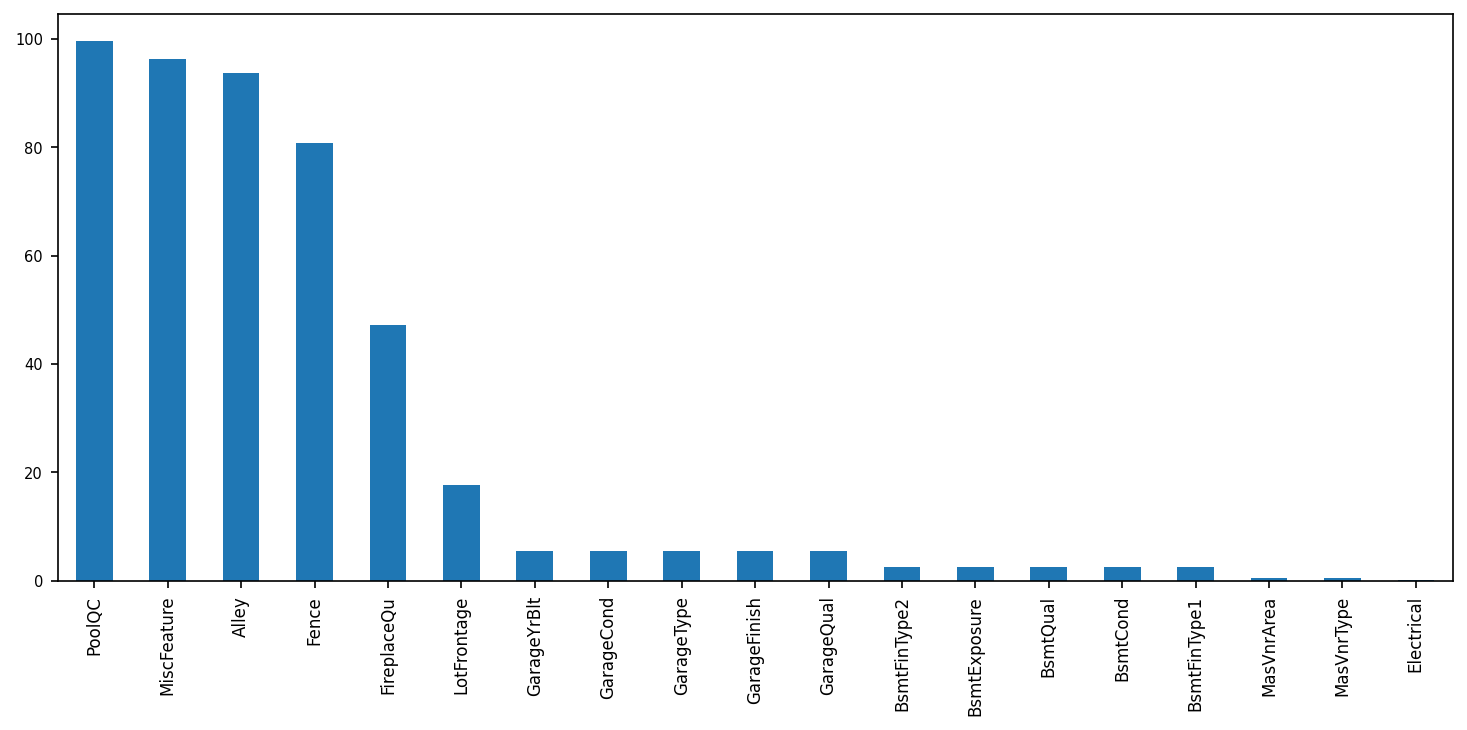

In [237]:
# Visualising null value data
plt.figure(figsize=[12,5],dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=7)
null_df[null_df['percent_null']>0]['percent_null'].plot.bar()
plt.show()

### **Inferences from visualization:**

- There are few columns like `PoolQC`, `MiscFeature`, `Alley`, `Fence` have very high null value, i.e >80%. We'll decide what to do with them during numerical & categorical columns' analysis.
- Remaining columns with low null values, we'll look into them for further analysis. We'll treat `numerical columns` & `categorical columns` differently.

### **Imputing NULL values in Numerical columns:**

In [238]:
# storing numeric columns with null values in a list
num_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)
num_null = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']
df[num_null].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1930.0,1961.0,1980.0,2002.0,2006.0,2007.0,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,0.0,166.0,335.0,456.0,791.92,1600.0
LotFrontage,1201.0,70.049958,24.284752,21.0,34.0,59.0,69.0,80.0,96.0,107.0,141.00,313.0


- `GarageYrBlt`, `LotFrontage` has median & mean at almost same value. `MasVnrArea` has lot of `0` in it & 50 percentile has 0 in them too. The percentage of missing value is 0.55. So we'll impute all those 3 numerical column with their median value.

In [239]:
# imputing null values with median in numeric columns
for i in num_null:
    # print(df[i].median()) # for debugging
    df[i].fillna(df[i].mean(),inplace=True)

In [240]:
# Printing unique values in all numerical columns
for i in num_cols:
    print(i,': ', df[i].nunique())

Id :  1460
MSSubClass :  15
LotFrontage :  111
LotArea :  1073
OverallQual :  10
OverallCond :  9
YearBuilt :  112
YearRemodAdd :  61
MasVnrArea :  328
BsmtFinSF1 :  637
BsmtFinSF2 :  144
BsmtUnfSF :  780
TotalBsmtSF :  721
1stFlrSF :  753
2ndFlrSF :  417
LowQualFinSF :  24
GrLivArea :  861
BsmtFullBath :  4
BsmtHalfBath :  3
FullBath :  4
HalfBath :  3
BedroomAbvGr :  8
KitchenAbvGr :  4
TotRmsAbvGrd :  12
Fireplaces :  4
GarageYrBlt :  98
GarageCars :  5
GarageArea :  441
WoodDeckSF :  274
OpenPorchSF :  202
EnclosedPorch :  120
3SsnPorch :  20
ScreenPorch :  76
PoolArea :  8
MiscVal :  21
MoSold :  12
YrSold :  5
SalePrice :  663


- From the level of unique values, we can see that `ID` column has all unique values. So we can't use it for our model.
- We can see that there are some columns with few values. If `values` are in range of `2~5`, that's more likely a discrete level than continuous. We'll treat them as `categorical columns`.

In [241]:
# dropping ID column
df.drop(columns=['Id'], inplace=True)
num_cols.remove('Id')

### **Understanding SalePrice column**

- SalePrice is our target/dependent variable. We'll check into it further for better insight.

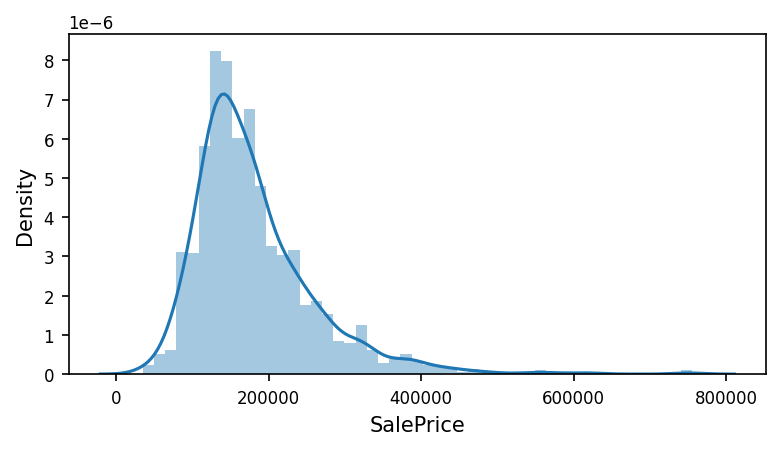

Skewness: 1.882876


In [242]:
# making distribution plot of SalePrice
plt.figure(figsize=(6,3),dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
sns.distplot(df['SalePrice'])
plt.show()

print("Skewness: %f" % df['SalePrice'].skew())

- We can see that the target column is positively/right skewed.
- How ever to use it in `linear regression` & get better result, we need to transform it.

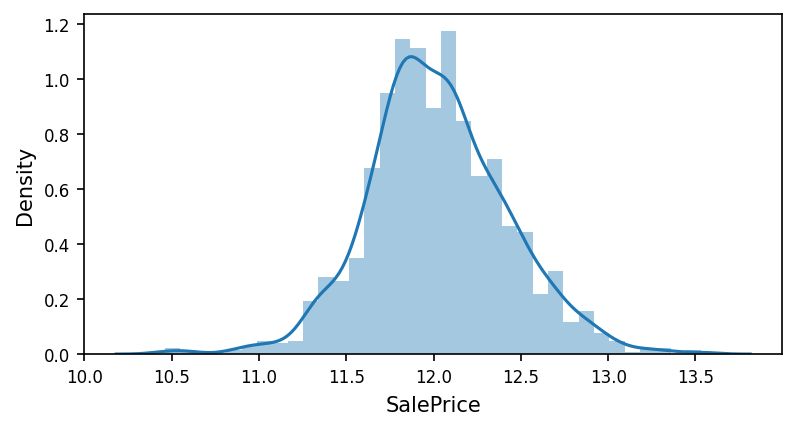

In [243]:
# Taking log transformation of SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

# making distribution plot of SalePrice after Transformation
plt.figure(figsize=(6,3),dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
sns.distplot(df['SalePrice'])
plt.show()

### **Let's Check boxplot of Numerical columns**

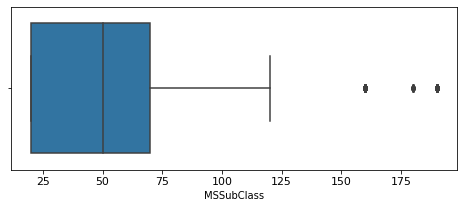

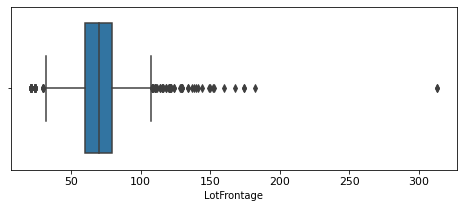

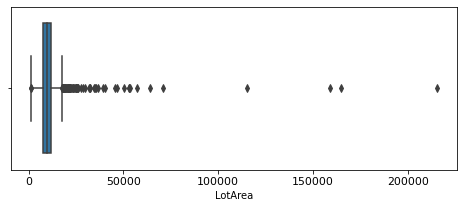

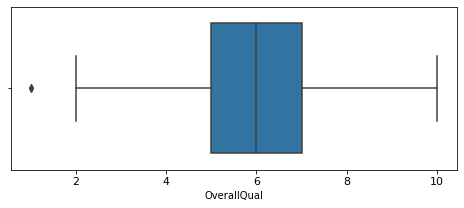

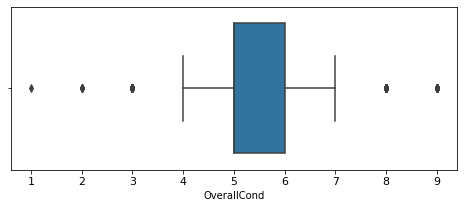

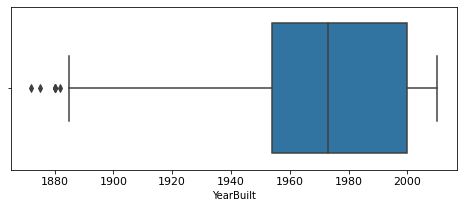

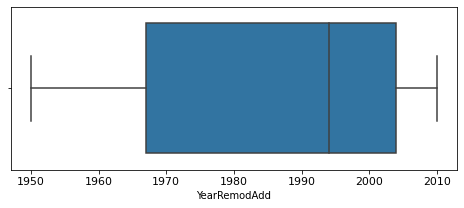

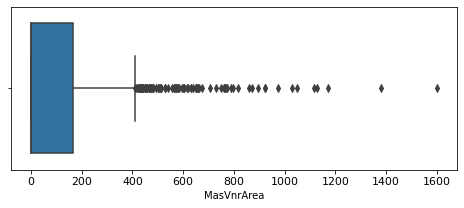

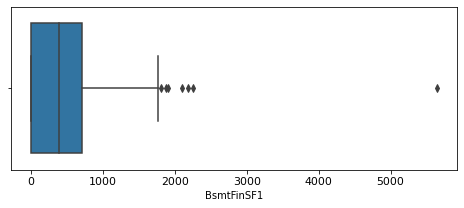

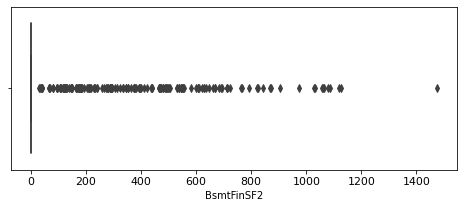

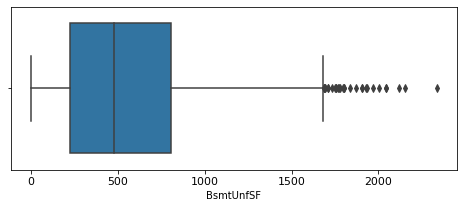

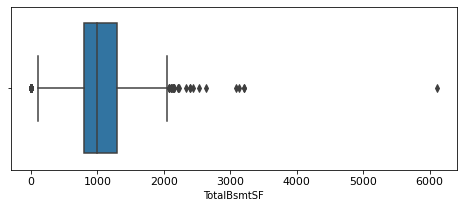

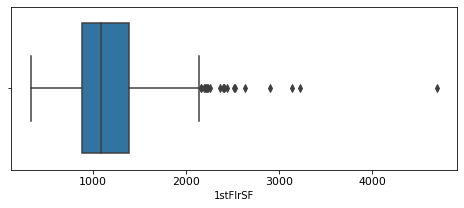

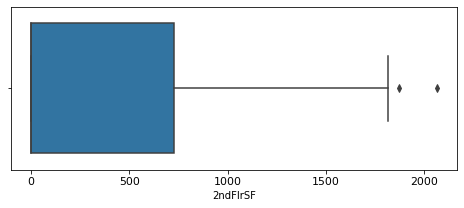

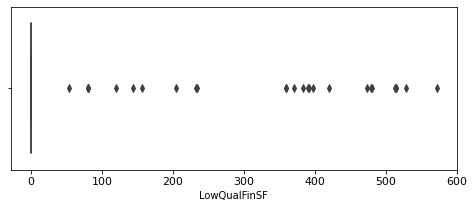

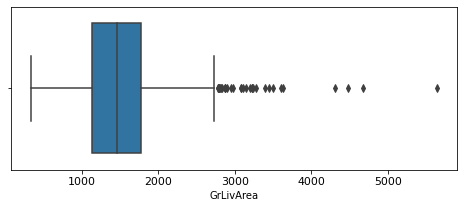

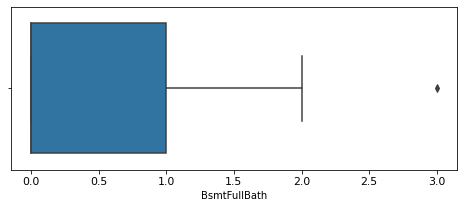

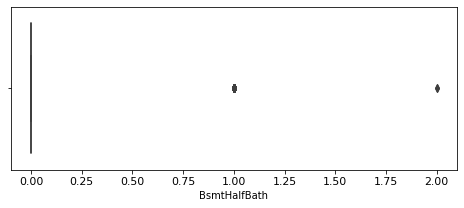

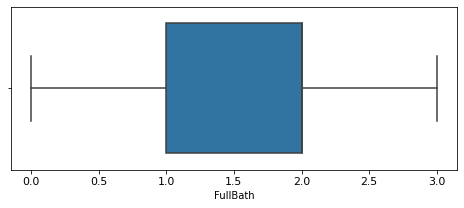

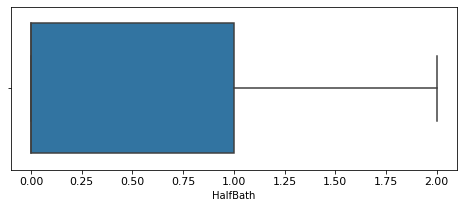

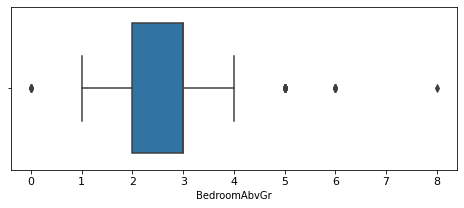

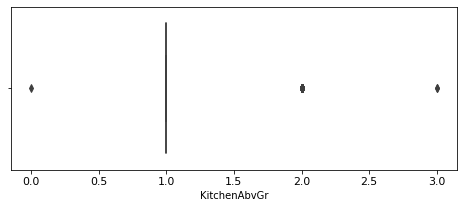

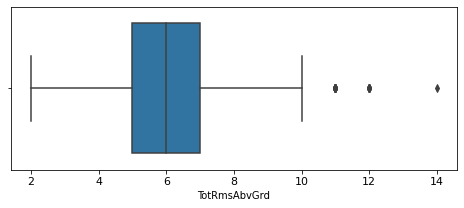

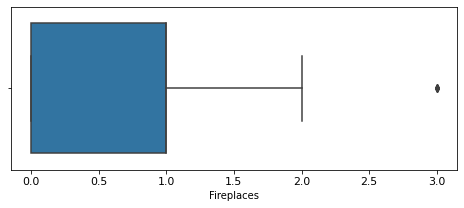

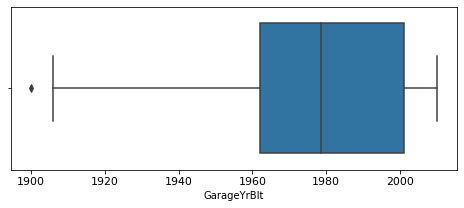

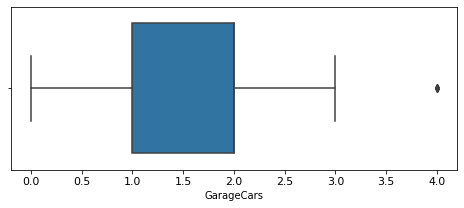

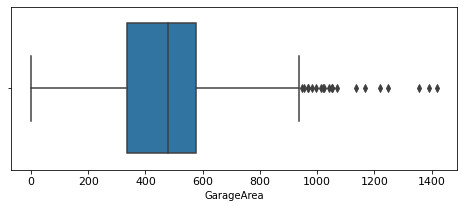

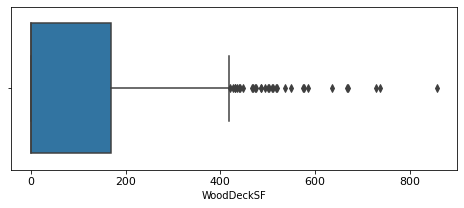

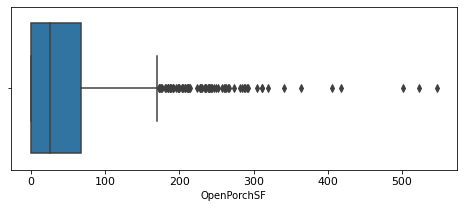

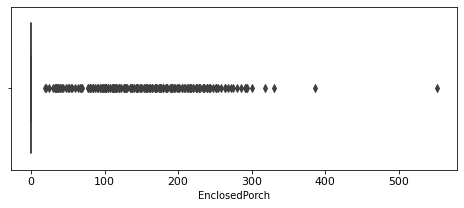

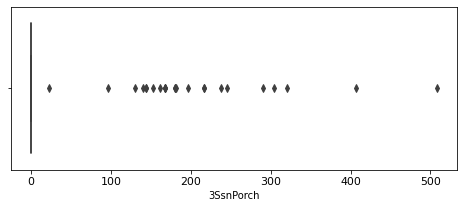

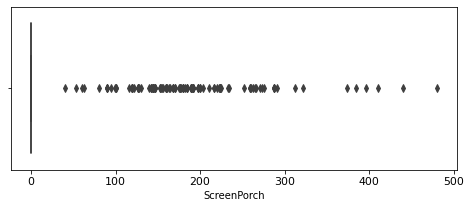

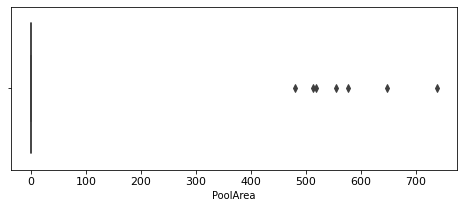

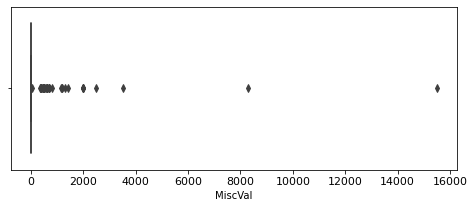

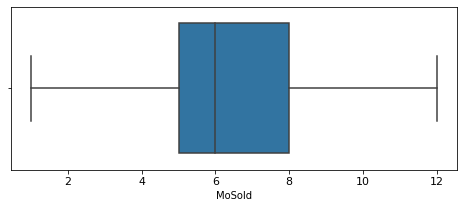

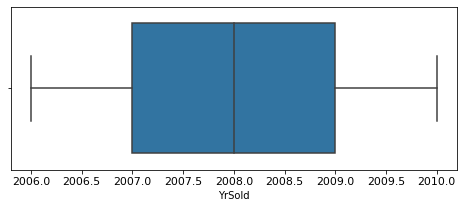

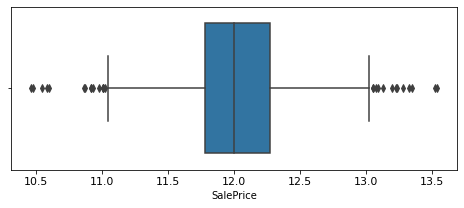

In [244]:
for i in num_cols:
    plt.figure(figsize=(8,3))
    plt.rc('xtick', labelsize=11)
    plt.rc('ytick', labelsize=11)
    sns.boxplot(x=i,data=df)
    plt.show()

### **Let's Check Scatterplot of numerical columns vs SalePrice**

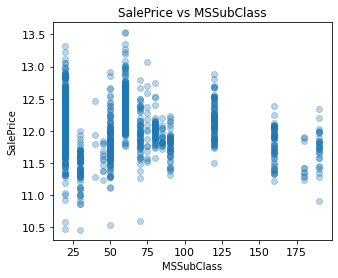

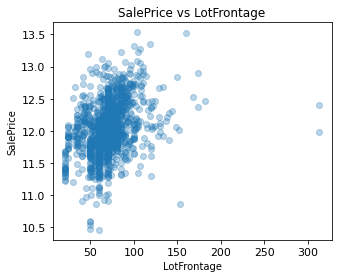

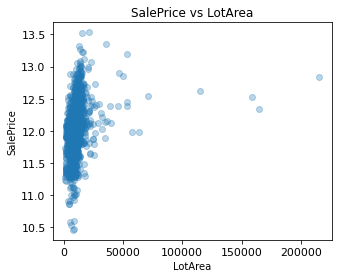

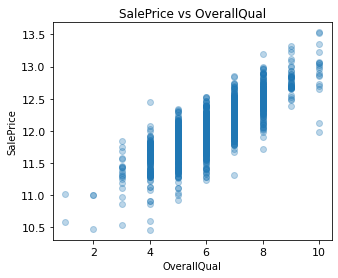

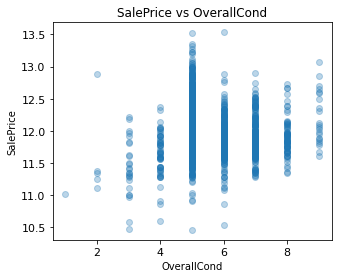

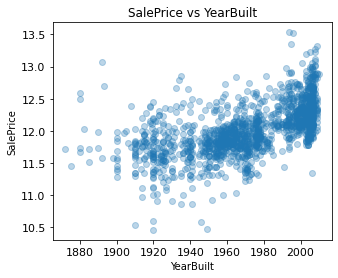

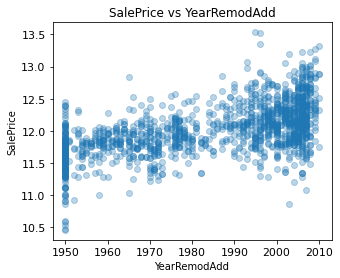

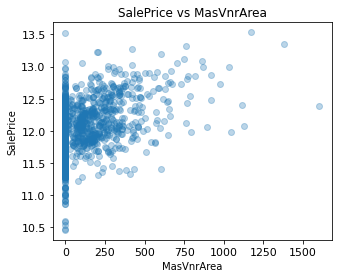

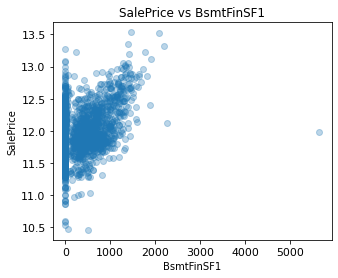

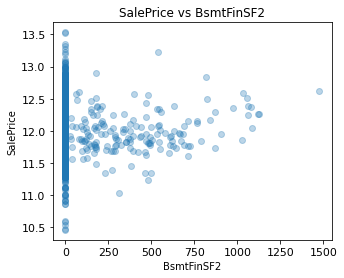

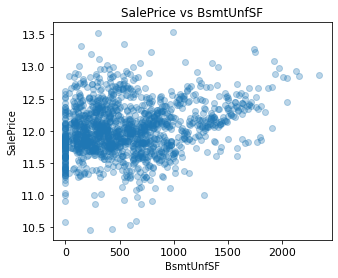

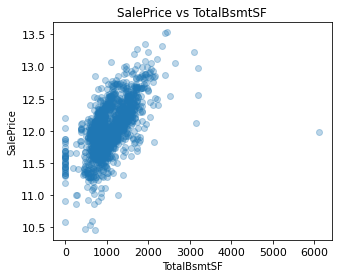

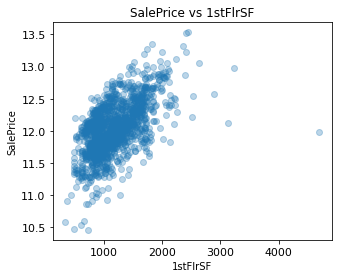

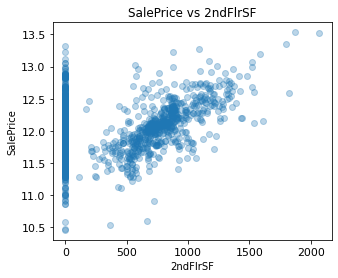

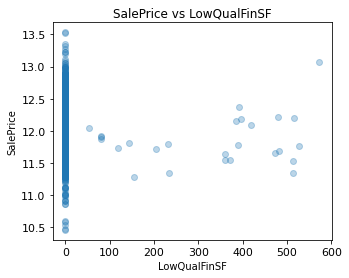

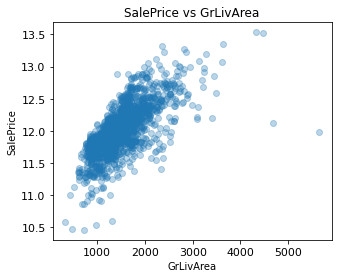

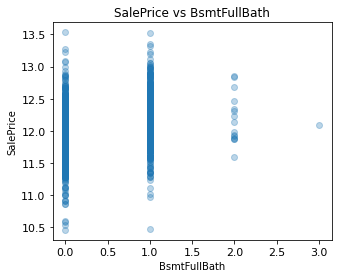

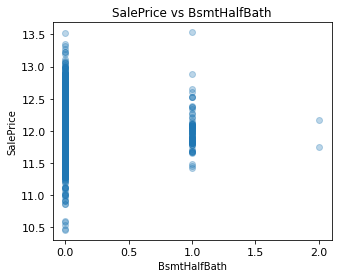

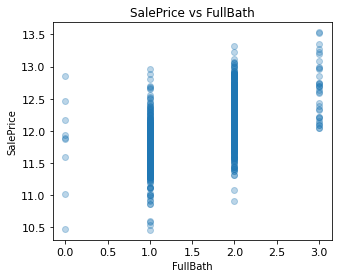

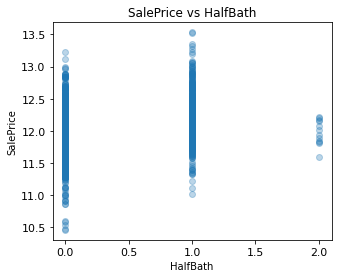

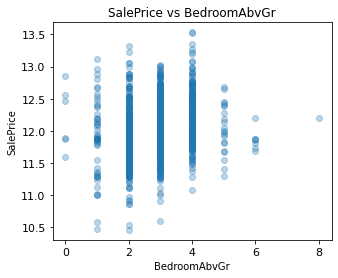

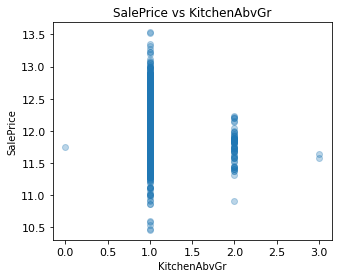

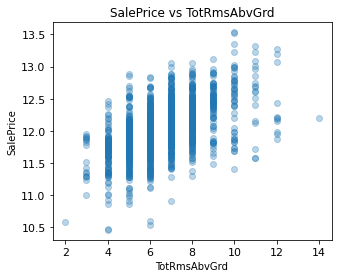

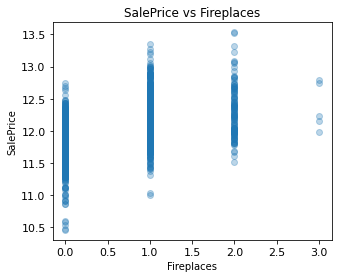

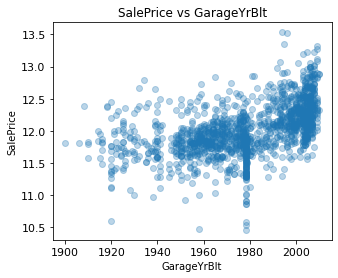

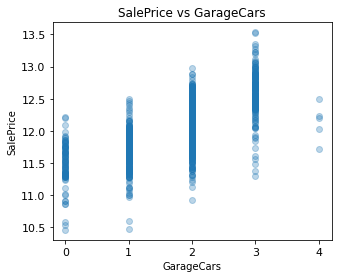

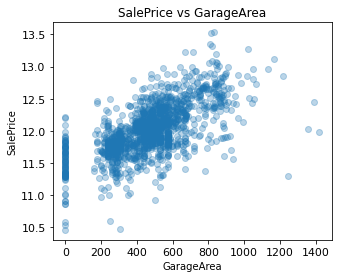

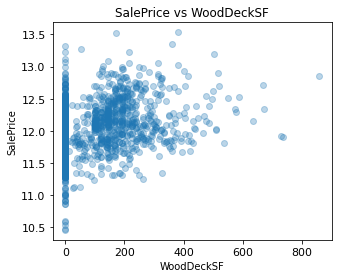

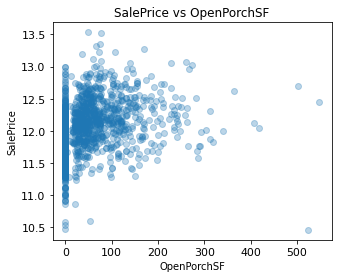

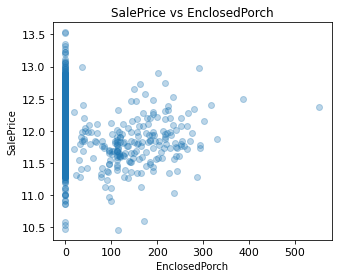

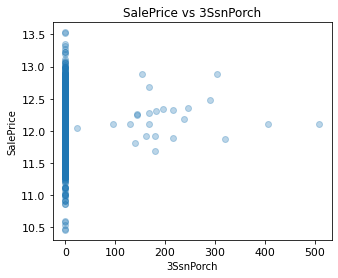

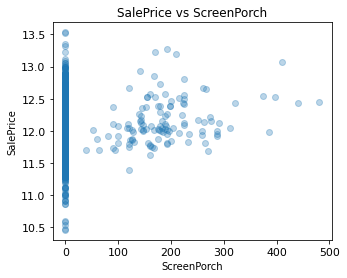

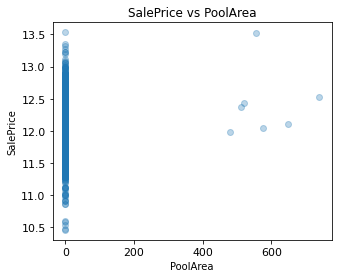

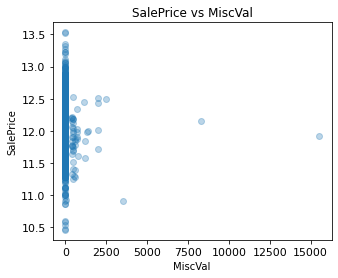

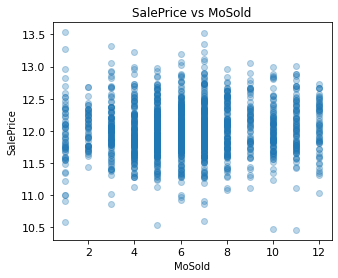

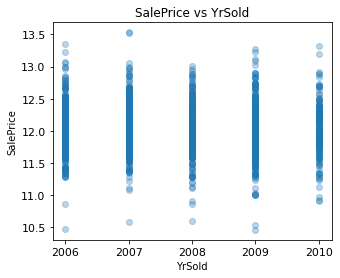

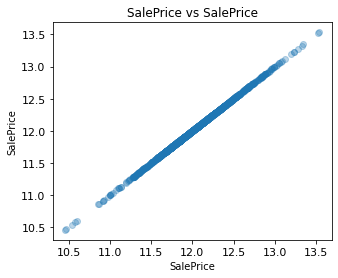

In [245]:
for i in num_cols:
    plt.figure(figsize=(5,4))
    plt.scatter(df[i],df['SalePrice'], alpha = 0.3)
    plt.title("SalePrice vs "+str(i))
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

### **Deriving some New features from Existing features**

- There are some columns like Year Built, Year Sold etc with `Year` as value. However, if we compare with current year i.e 2021, & get age of those column, that will be a better way to interprete.

In [246]:
# List of features with year as value
year_cols = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

# Getting Age from year, taking 2021 as present year
for i in year_cols:  
    df[i+'_age'] = 2021 - df[i]

# Removing old features
df.drop(year_cols, axis=1, inplace=True)
for i in year_cols:
    num_cols.remove(i)
    new_age = i+'_age'
    num_cols.append(new_age)
print(num_cols)

df[[i+'_age' for i in year_cols]].head()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age', 'GarageYrBlt_age']


,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
0,18,18,13,18.0
1,45,45,14,45.0
2,20,19,13,20.0
3,106,51,15,23.0
4,21,21,13,21.0


### Let's see correlation matrix of Numerical columns

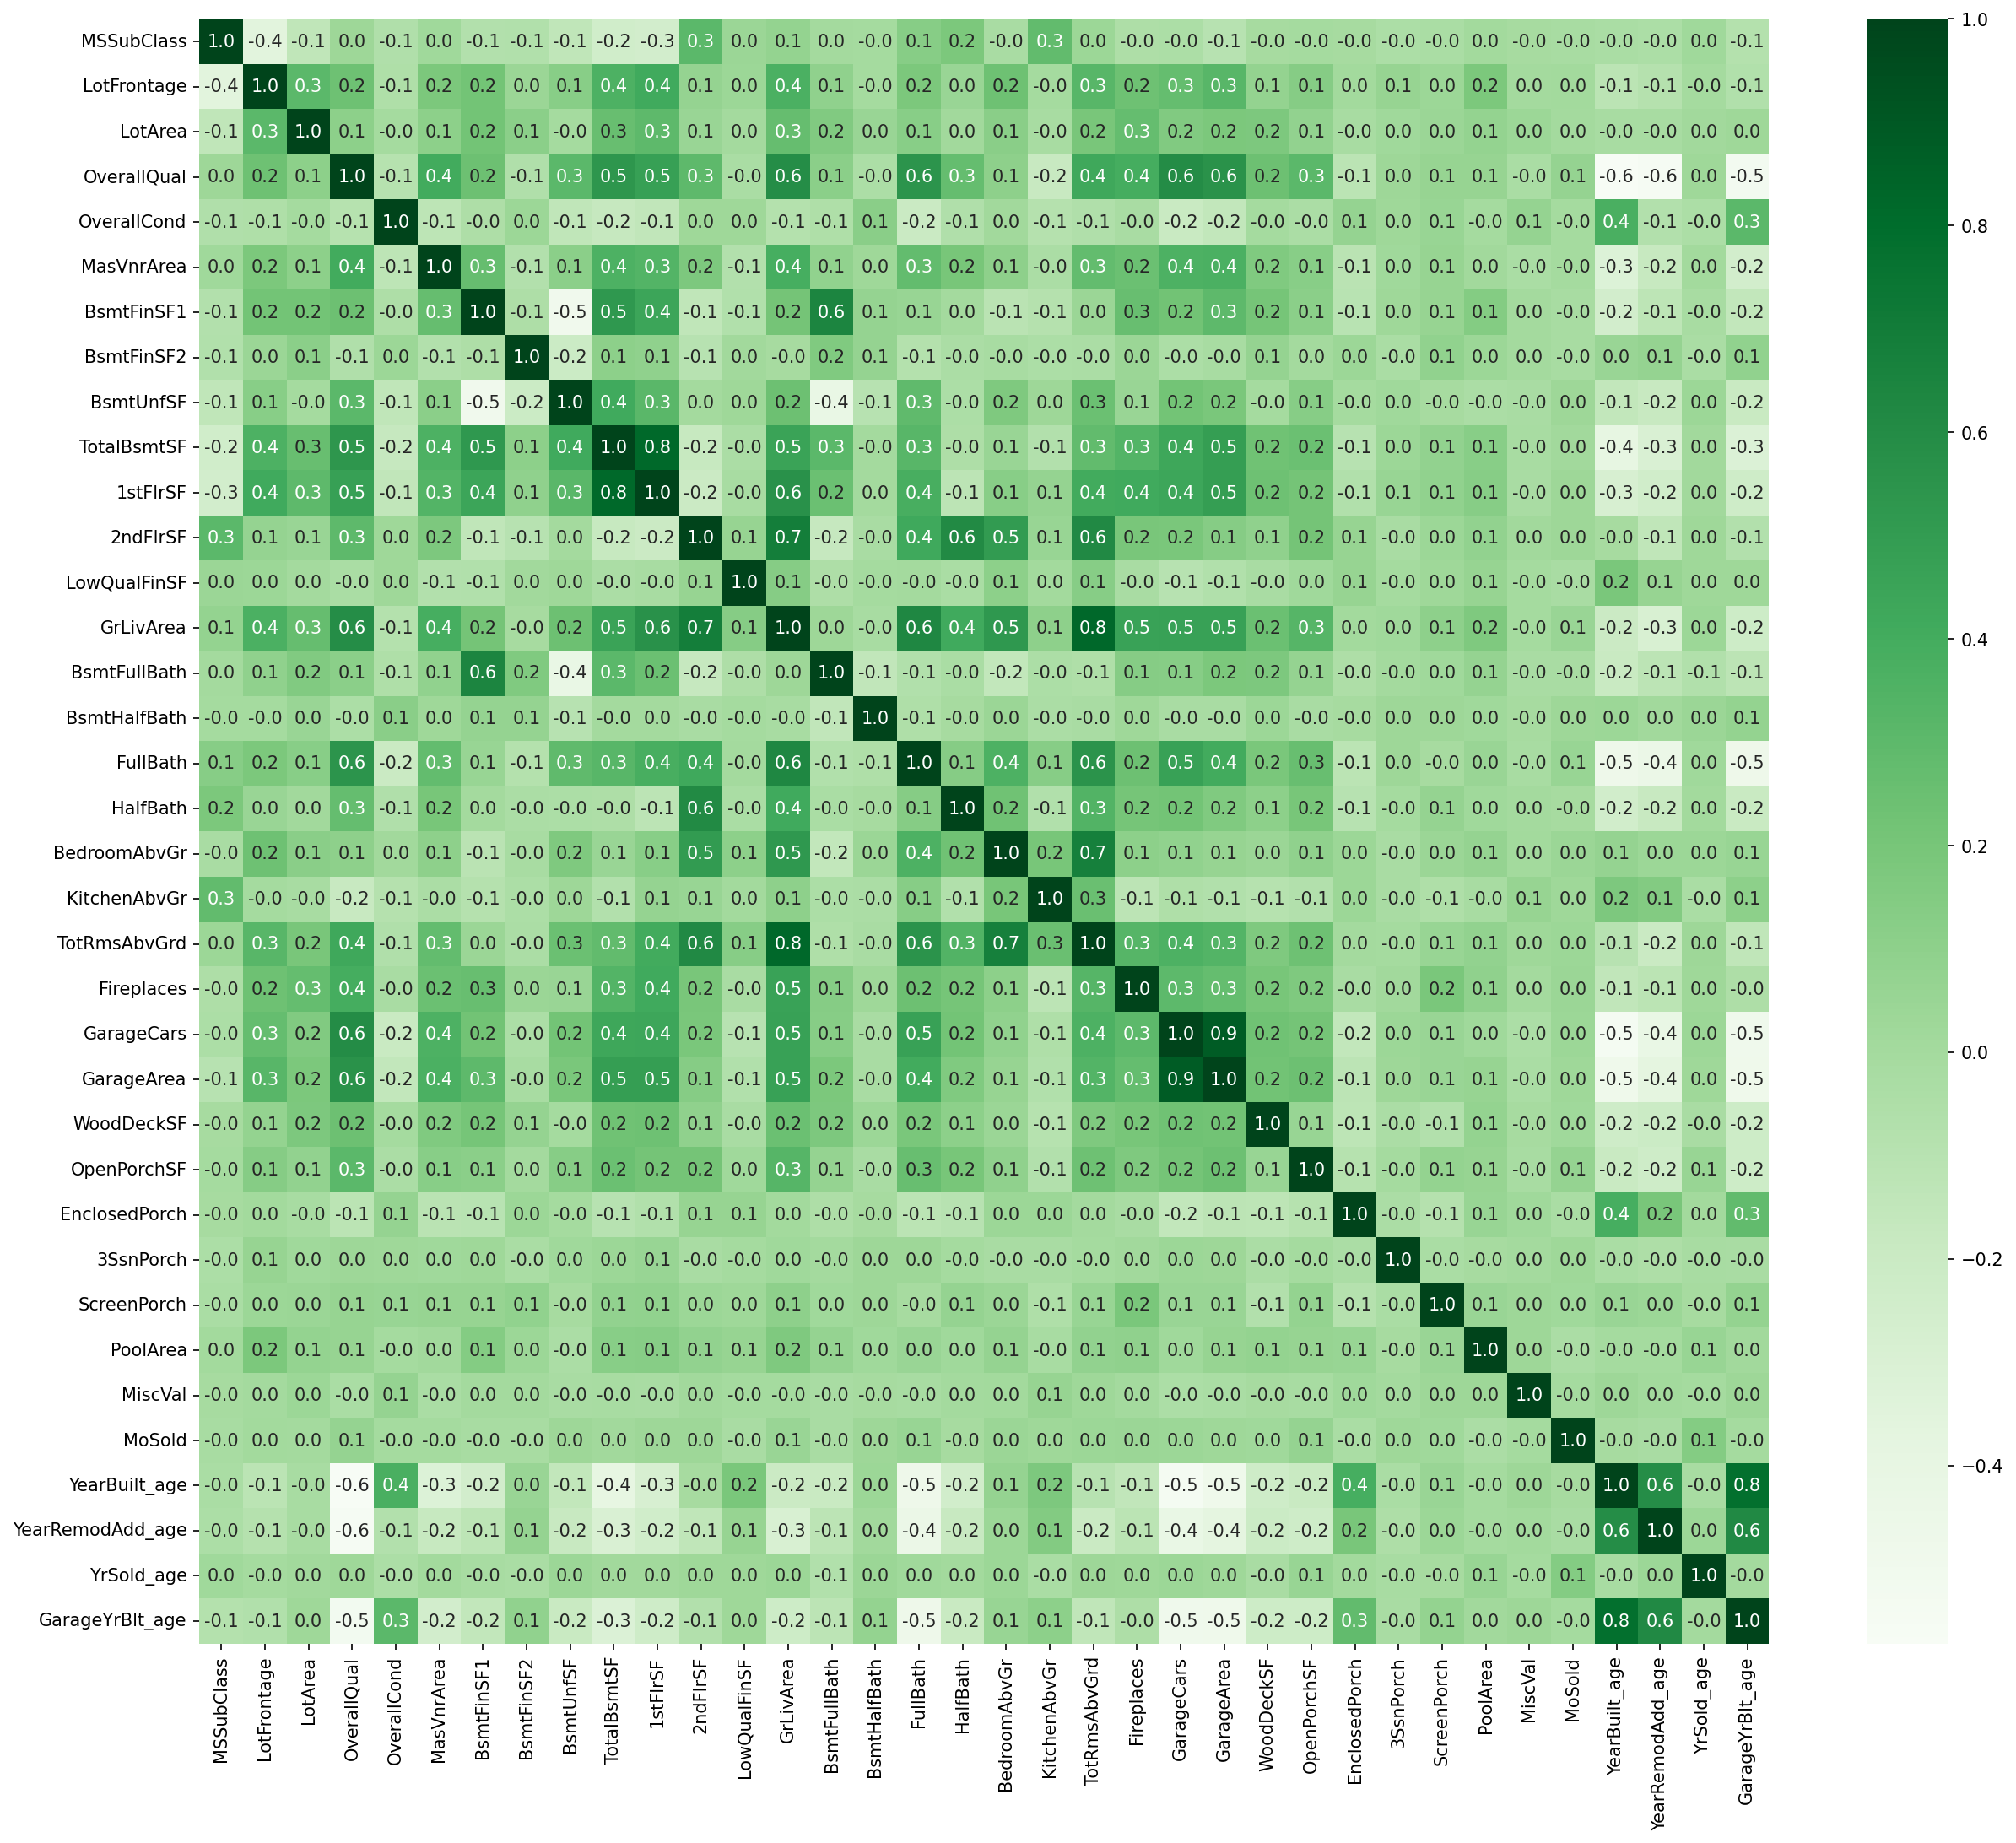

In [247]:
# Plotting the heatmap
fig = plt.figure(figsize=(20,17),dpi=150)

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

num_cols.remove('SalePrice')
sns.heatmap(df[num_cols].corr(), annot = True, cmap="Greens",fmt='.1f')
plt.show()

#### **Insights from correlation Heatmap**

- There are some predictors with high `colinnearity` among themselves. They are:
  1. YearBuilt_Age   & GarageYrBlt_age
  2. TotRmsAbvGr & GrLivArea
  3. 1stFlrSF & TotalBsmtSF
  4. GarageCars & GarageArea
- We need to drop these variables to avoid multicolinearity.

In [248]:
# removing the colinear features 

rm = ['GarageCars','GarageYrBlt_age','1stFlrSF','TotRmsAbvGrd']
df.drop(columns=rm,inplace=True)
for i in rm:
  num_cols.remove(i)

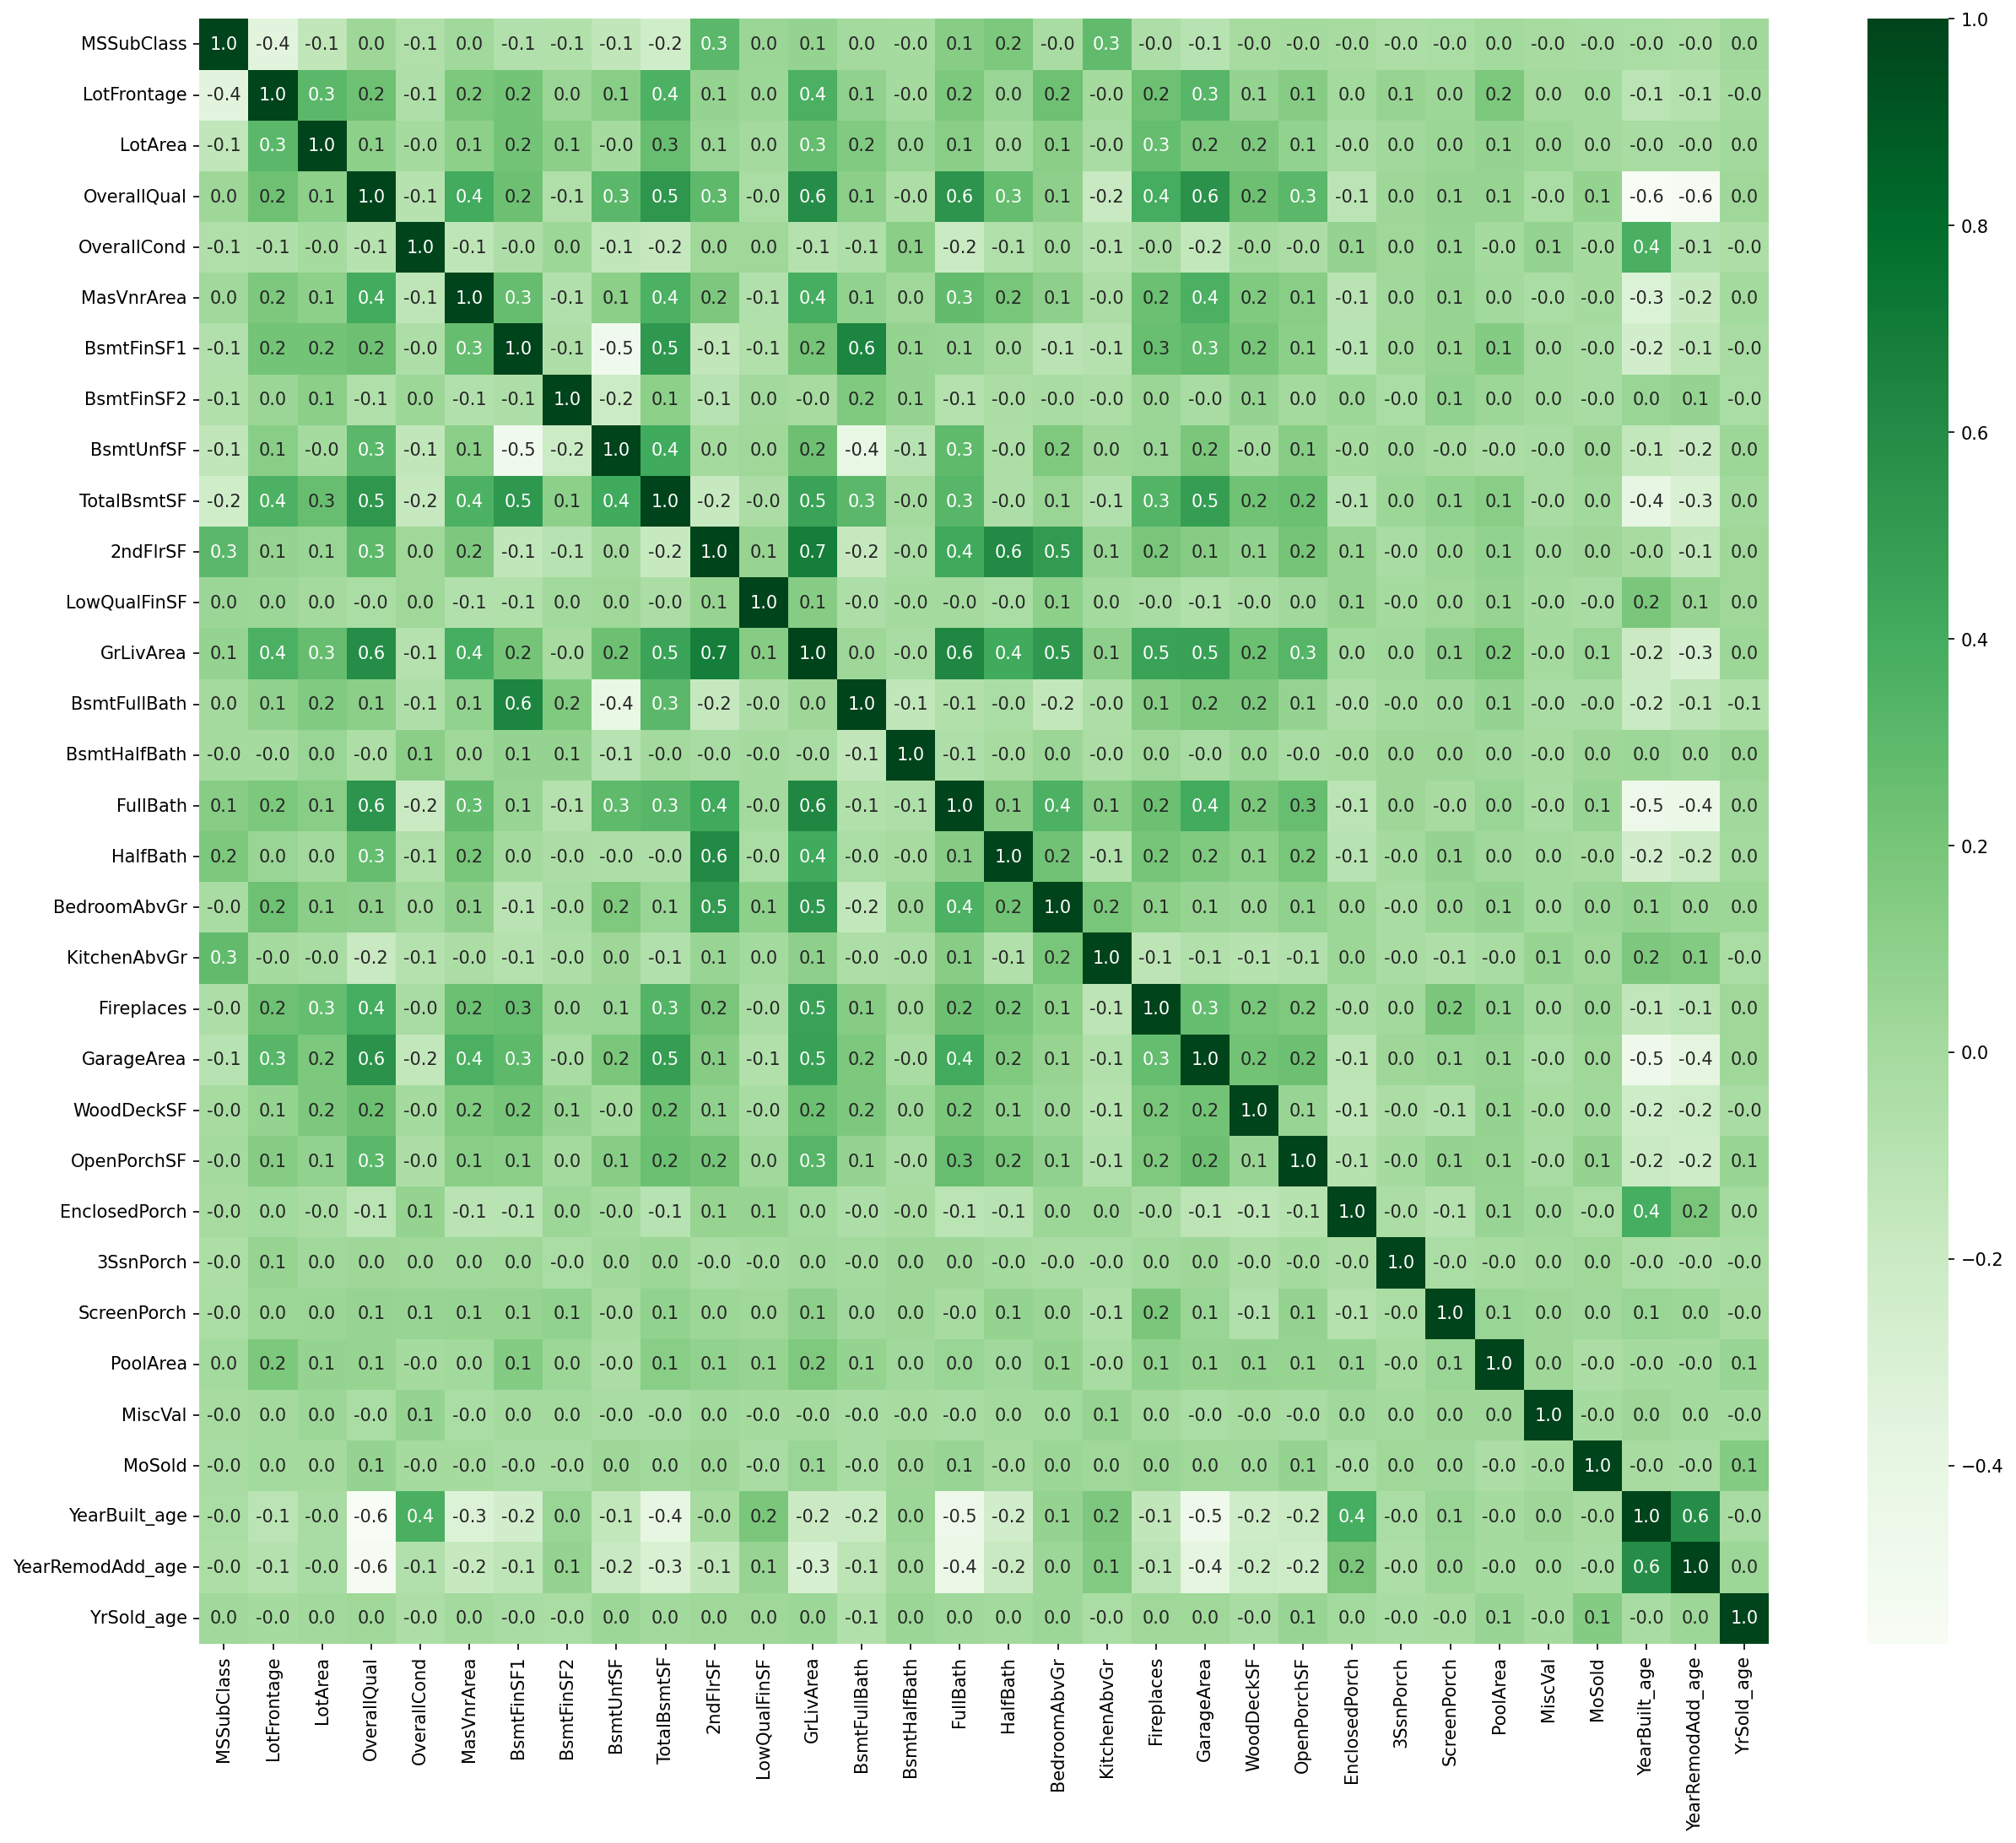

In [249]:
# re-Plotting the heatmap
fig = plt.figure(figsize=(20,17),dpi=150)

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.heatmap(df[num_cols].corr(), annot = True, cmap="Greens",fmt='.1f')
plt.show()

- We'll proceed with these features for now.

### **Let's Check Categorical columns**

- Then we'll check value_counts or levels in each categorical columns.
- We'll start by checking null values in categorical columns & will do imputation as required.
- Then we'll use dummy encoding to get numerical columns from categorical one.


#### **Checking levels:**

In [250]:
# getting categorical columns
cat_cols = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [251]:
# Chceking the value counts present in categorical columns 
for i in cat_cols:
    print(i,':\n',df[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------

Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------

Alley:
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------

LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------

LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------

Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------

LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------

LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------

Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somer

- We can see that `Alley`, `PoolQC`, `Fence`, `MiscFeature`, `FireplaceQu` columns have very high Null value. However, from Dictionary provided we can see that, those NaN value mostlikely mean `No` or `None`. We can impute these columns with `None`.
- Also on columns like `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` has `NaN` values. Those also mean the field was not applicable to those particular house. So we can impute them with `None` too.
- `MasVnrType`, `Electrical` columns have very low `NaN` value. We'll impute them with mode of column.

In [252]:
# Imputing NaN value with None where NaN means None
nan_fill = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in nan_fill:
    df[i].fillna("None", inplace=True)

In [253]:
# filling 2 columns with mode
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)   
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [254]:
# checking non-null value using info, if they are all 1460
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   Alley             1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   Utilities         1460 non-null   object 
 9   LotConfig         1460 non-null   object 
 10  LandSlope         1460 non-null   object 
 11  Neighborhood      1460 non-null   object 
 12  Condition1        1460 non-null   object 
 13  Condition2        1460 non-null   object 
 14  BldgType          1460 non-null   object 
 15  HouseStyle        1460 non-null   object 
 16  OverallQual       1460 non-null   int64  


- As we can see, there are no `NULL value`. Hence, We can proceed further for model building.

### **Data Preparation for model Building**

#### Getting Dummy variable for categorical Columns

In [255]:
# getting dummy variables using one-hot encoding
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
print(df_dummies.shape)
df_dummies.head()

(1460, 223)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Getting final dataframe

- We'll concat numerical columns with dummy encoded categorical dataframe

In [256]:
num_cols.append('SalePrice')
df_final = pd.concat([df[num_cols], df_dummies], axis=1)
df_final.shape

(1460, 256)

#### Splitting into Predictor & Target variable

In [257]:
# Getting X & y
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']
X.shape, y.shape

((1460, 255), (1460,))

#### Getting Train & Test dataset for model Building

In [258]:
# splitting into train and test dataframe using sklearn library 
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# cheking shape of train test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 255)
(438, 255)
(1021,)
(438,)


#### **Scaling dataset using Standard Scaler**

In [259]:
# initializing Scaler
scaler = StandardScaler()

# since we don't scale price
num_cols.remove('SalePrice')

# fit & transform in train dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
display(X_train.head())

# transform in test dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])
display(X_test.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_age,YearRemodAdd_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.123555,-0.473765,-0.779861,0.383154,-0.560537,0.043512,-0.293313,-0.374367,-0.430911,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.925422,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.524903,1.694350,-0.134653,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.918688,-0.056845,0.649651,-0.533005,0.807462,1.160345,-0.293313,-0.454644,0.621579,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0.623522,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.717033,-0.390956,-0.881833,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.803279,-0.169324,-0.065105,-1.449164,-0.560537,-0.761296,-0.293313,0.171964,-0.712011,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,0.623522,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.865510,1.694350,-1.629012,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.486074,-0.502297,-0.065105,2.215472,-0.560537,-0.963574,-0.293313,-0.1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_age,YearRemodAdd_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.440759,-0.144189,-1.494617,0.383154,-0.560537,0.361992,-0.293313,-0.704396,-0.430911,-0.787597,-0.124502,-1.228053,-0.837450,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,-0.925422,0.265498,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.468306,0.008299,0.675945,0.612526,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.873373,0.112505,0.649651,-0.533005,-0.560537,-0.963574,-0.293313,0.660317,-0.439628,1.189021,-0.124502,0.381706,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,-0.925422,0.439515,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0.623338,-1.079700,-0.924407,1.359706,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.304815,-0.253368,0.649651,-0.533005,-0.357475,-0.963574,-0.293313,1.500998,0.381881,-0.787597,-0.124502,-0.496515,-0.837450,-0.247791,0.786428,-0.751723,0.176772,-0.234155,0.623522,-0.327104,1.025020,-0.391783,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,-0.782973,-0.536443,0.612526,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
382,0.035976,0.420224,-0.120412,0.649651,-0.533005,-0.560537,-0.963574,-0.293313,0.83

### **Building a Initial LinearRegression Model**

In [260]:
# initializing LinearRegression
linreg = LinearRegression()

# Getting top 45 features to train Linear Regression Model
rfe = RFE(linreg, n_features_to_select=45)
rfe = rfe.fit(X_train, y_train)

In [261]:
pd.DataFrame({'Features': list(X_train.columns),
              'Selection':list(rfe.support_)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254
Features,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_age,YearRemodAdd_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Selection,False,False,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [262]:
# get list of best columns
col=list(X_train.columns[rfe.support_])

# adding a constant as per statsmodel requirement
X_train_rfe = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:34:24   Log-Likelihood:                 329.59
No. Observations:                1021   AIC:                            -595.2
Df Residuals:                     989   BIC:                            -437.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.87

- We can see that, there are still some high p-value features that we need to eliminate manually one by one.
- However since we got lot of features & these seems complex problem, Next we'll use polinomial regression with Regulerization technique like `Ridge & Lasso`.

### **Ridge Regression (L2 Regulerization norm)**

In [263]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge(random_state=100)

# cross validation :

folds = 4
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [264]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']].head()

,param_alpha,params,mean_test_score,mean_train_score
0,0.001,{'alpha': 0.001},-0.092281,-0.054641
1,0.01,{'alpha': 0.01},-0.091696,-0.054786
2,0.05,{'alpha': 0.05},-0.090847,-0.055420
3,0.1,{'alpha': 0.1},-0.090852,-0.056321
4,0.2,{'alpha': 0.2},-0.091209,-0.057945


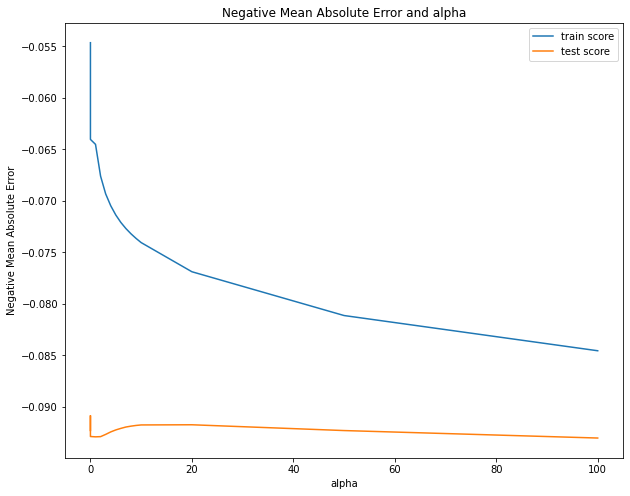

In [265]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='best')
plt.show()

- As we can see, performance on test is almost constant.
- However, performance on test decreases gradually on train. We'll consider elbow position i.e `20` for `alpha value` & use it with Ridge Regression.

#### **Building Ridge Regression Model**

In [266]:
# Building Ridge model with right parameter
ridge = Ridge(alpha=20, random_state=100)
ridge.fit(X_train, y_train)

Ridge(alpha=20, random_state=100)

#### **Evaluationg Model**

In [267]:
# getting predicted values
y_pred_ridge_train= ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

# Printing R2 score
print('Train R2 Square : ', round(metrics.r2_score(y_train,y_pred_ridge_train), 4))
print('Test R2 Square : ', round(metrics.r2_score(y_test,y_pred_ridge_test),4))

Train R2 Square :  0.9137
Test R2 Square :  0.8807


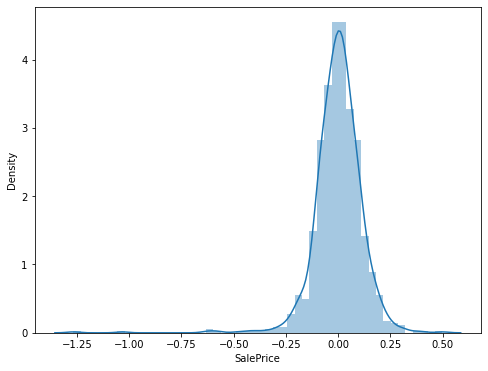

In [268]:
# Plotting Residuals distribution
plt.figure(figsize=(8,6))
sns.distplot((y_train - y_pred_ridge_train))
plt.show()

- We can see that `Error Terms` are `Normally Distributed`. So it holds Normality assumption for residuals.

In [269]:
# Ridge model parameters coeffieients
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(i, 4) for i in model_parameters]

cols = X.columns
cols = cols.insert(0, "constant")

ridge_params = pd.DataFrame({'Feature': list(cols),
                              'Coeff':list(model_parameters)})
ridge_params = ridge_params[ridge_params['Coeff']!=0]
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index).head(12)

,Feature,Coeff
0,constant,11.7454
13,GrLivArea,0.1005
4,OverallQual,0.0857
58,Neighborhood_Crawfor,0.0815
59,Neighborhood_Edwards,-0.0712
68,Neighborhood_NridgHt,0.0644
233,PoolQC_Gd,-0.0634
61,Neighborhood_IDOTRR,-0.0525
78,Condition1_Norm,0.0522
88,Condition2_PosN,-0.0517


### **Lasso Regulerization (L1 Norm)**

In [270]:
# Initializing Lasso Regulerization Object
lasso = Lasso(random_state=100)

# Getting right alpha value from GridSearch
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [271]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']].head()

,param_alpha,params,mean_test_score,mean_train_score
0,0.001,{'alpha': 0.001},-0.086891,-0.074101
1,0.01,{'alpha': 0.01},-0.101057,-0.097169
2,0.05,{'alpha': 0.05},-0.126598,-0.124952
3,0.1,{'alpha': 0.1},-0.162887,-0.161833
4,0.2,{'alpha': 0.2},-0.234688,-0.233970


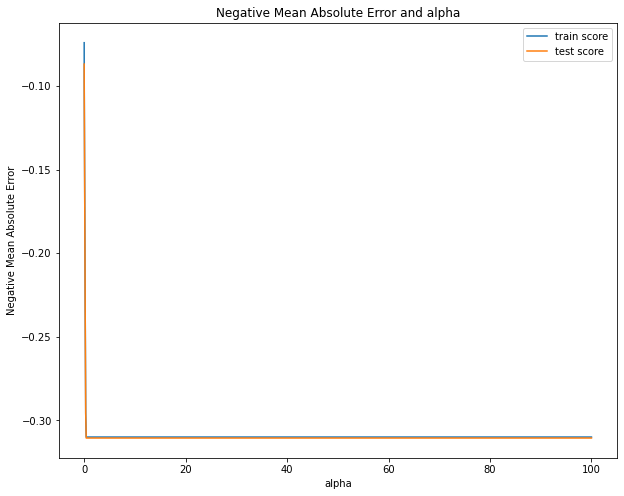

In [272]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
cv_results

# plotting -MAE vs Alpha
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='best')
plt.show()

#### **Building final Model**

- We'll use `0.003 for alpha` value & build the model.

In [273]:
# Building Lasso Model with suitable alpha value
lasso = Lasso(alpha = 0.003, random_state=100)
lasso.fit(X_train, y_train)

Lasso(alpha=0.003, random_state=100)

#### **Evaluating Model**

In [274]:
# getting predicted value from model
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

# printing R2 Score
print('Train R2 Square : ', round(metrics.r2_score(y_train, y_pred_lasso_train), 4))
print('Test R2 Square : ', round(metrics.r2_score(y_test, y_pred_lasso_test), 4))

Train R2 Square :  0.8798
Test R2 Square :  0.8656


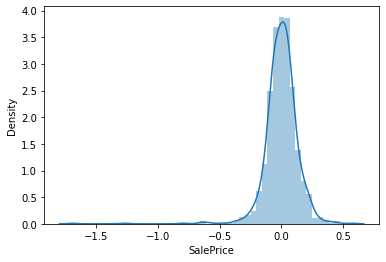

In [275]:
# distribution plot of residuals
sns.distplot((y_train-y_pred_lasso_train))
plt.show()

In [276]:
# creating a DataFrame with coefficient & column names
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]

cols = X.columns
cols = cols.insert(0, "constant")

lasso_params = pd.DataFrame({ 'Feature': list(cols),
                              'Coeff': list(model_parameters)})

lasso_params = lasso_params[lasso_params['Coeff']!=0]
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index).head(12)

,Feature,Coeff
0,constant,11.9648
4,OverallQual,0.1140
13,GrLivArea,0.1077
30,YearBuilt_age,-0.0604
21,GarageArea,0.0441
5,OverallCond,0.0414
78,Condition1_Norm,0.0406
59,Neighborhood_Edwards,-0.0391
14,BsmtFullBath,0.0333
58,Neighborhood_Crawfor,0.0332


In [277]:
print('No of Features selected by Lasso:', lasso_params.shape[0])

No of Features selected by Lasso: 44


## **Inference**


- we have done both Ridge and Lasso Regression in the dataset.
- we have concluded top 10 variables which manupulates the price of houses and can be used to the best for our business purpose.

- so the predictor variables we got from Ridge Regularization :
                            1.GrLivArea
                            2.OverallQual
                            3.Neighborhood_Crawfor
                            4.Neighborhood_Edwards
                            5.Neighborhood_NridgHt
                            6.PoolQC_Gd
                            7.Neighborhood_IDOTRR
                            8.Condition1_Norm
                            9.Condition2_PosN
                            10.Neighborhood_Somerst
                           

                            
- The predictor variables from Lasso Regularization :
  
                            1.OverallQual
                            2.GrLivArea
                            3.YearBuilt_age
                            4.GarageArea
                            5.OverallCond
                            6.Condition1_Norm
                            7.Neighbourhood_Edwards
                            8.BsmtFullBath
                            9.Neighbourhood_Crawfor
                            10.MSZoning_RM
                            
                          

## **Assignment Question**

### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- The optimal value alpha/lambda for final model is:
  - Ridge: 20
  - Lasso: 0.003

- Taking double of them will make alpha for Ridge 40 & for Lasso 0.006.
- Let's Rebuild the model & see how it affects the model.

#### **Doubling alpha for Ridge**


In [278]:
# Building Ridge model with double the alpha we used previously
ridge = Ridge(alpha=40, random_state=100)
ridge.fit(X_train, y_train)

# getting predicted values
y_pred_ridge_train= ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

# printing R2 Score
print('Train R2 Square : ', round(metrics.r2_score(y_train,y_pred_ridge_train), 4))
print('Test R2 Square : ', round(metrics.r2_score(y_test,y_pred_ridge_test),4))

Train R2 Square :  0.9057
Test R2 Square :  0.8784


In [279]:
# Ridge model parameters coeffieients
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(i, 4) for i in model_parameters]

cols = X.columns
cols = cols.insert(0, "constant")

ridge_params = pd.DataFrame({'Feature': list(cols),
                              'Coeff':list(model_parameters)})
ridge_params = ridge_params[ridge_params['Coeff']!=0]
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index).head(12)

,Feature,Coeff
0,constant,11.8136
13,GrLivArea,0.0890
4,OverallQual,0.0882
58,Neighborhood_Crawfor,0.0575
59,Neighborhood_Edwards,-0.0558
68,Neighborhood_NridgHt,0.0468
78,Condition1_Norm,0.0444
5,OverallCond,0.0409
21,GarageArea,0.0382
35,MSZoning_RL,0.0370


#### **Doubling alpha for Lasso**

In [280]:
# building Lasso model with double alpha value
lasso = Lasso(alpha = 0.006, random_state=100)
lasso.fit(X_train, y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

# printing performance
print('Train R2 Square : ', round(metrics.r2_score(y_train,y_pred_lasso_train), 4))
print('Test R2 Square : ', round(metrics.r2_score(y_test,y_pred_lasso_test), 4))

Train R2 Square :  0.8665
Test R2 Square :  0.8576


In [281]:
# creating a DataFrame with coefficient & column names
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]

cols = X.columns
cols = cols.insert(0, "constant")

lasso_params = pd.DataFrame({ 'Feature': list(cols),
                              'Coeff': list(model_parameters)})

lasso_params = lasso_params[lasso_params['Coeff']!=0]
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index).head(12)

,Feature,Coeff
0,constant,11.9865
4,OverallQual,0.1245
13,GrLivArea,0.1079
30,YearBuilt_age,-0.0683
21,GarageArea,0.0460
5,OverallCond,0.0356
20,Fireplaces,0.0340
14,BsmtFullBath,0.0339
31,YearRemodAdd_age,-0.0327
10,TotalBsmtSF,0.0238


### Q3. After building the model, you realised that the five most important Predictor variables in the lasso model are not available in the incoming data. you will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [282]:
# Dropping top 5 feature from final model
X_train_as = X_train.drop(['OverallQual', 'GrLivArea', 'YearBuilt_age', 'GarageArea', 'OverallCond'], axis=1)
X_test_as = X_test.drop(['OverallQual', 'GrLivArea', 'YearBuilt_age', 'GarageArea', 'OverallCond'], axis=1)

In [283]:
# creating Lasso Regulerization model without top 5 features
lasso = Lasso(alpha = 0.005, random_state=100)
lasso.fit(X_train_as, y_train)

y_pred_lasso_train = lasso.predict(X_train_as)
y_pred_lasso_test = lasso.predict(X_test_as)

# printing performance
print('Train R2 Square : ', round(metrics.r2_score(y_train,y_pred_lasso_train), 4))
print('Test R2 Square : ', round(metrics.r2_score(y_test,y_pred_lasso_test), 4))

Train R2 Square :  0.8235
Test R2 Square :  0.7961


In [284]:
# creating a DataFrame with coefficient & column names
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]

cols = X_train_as.columns
cols = cols.insert(0, "constant")

lasso_params = pd.DataFrame({ 'Feature': list(cols),
                              'Coeff': list(model_parameters)})

lasso_params = lasso_params[lasso_params['Coeff']!=0]
lasso_params = lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index).head(12)

In [285]:
print('New Top 5 Features are:\n', lasso_params[1:6].values)

New Top 5 Features are:
 [['TotalBsmtSF' 0.1084]
 ['2ndFlrSF' 0.0759]
 ['GarageCond_TA' 0.0723]
 ['YearRemodAdd_age' -0.0685]
 ['FullBath' 0.0565]]
